<a href="https://colab.research.google.com/github/sabarishkannaramesh/dlt/blob/main/dltexp6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/2
782/782 ━━━━━━━━━━━━━━━━━━━━ 457s 576ms/step - accuracy: 0.7020 - loss: 0.8626 - val_accuracy: 0.7864 - val_loss: 0.6191
Epoch 2/2
782/782 ━━━━━━━━━━━━━━━━━━━━ 503s 577ms/step - accuracy: 0.8069 - loss: 0.5436 - val_accuracy: 0.7945 - val_loss: 0.5935
313/313 ━━━━━━━━━━━━━━━━━━━━ 66s 210ms/step - accuracy: 0.7964 - loss: 0.5941
Test Accuracy: 0.79
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


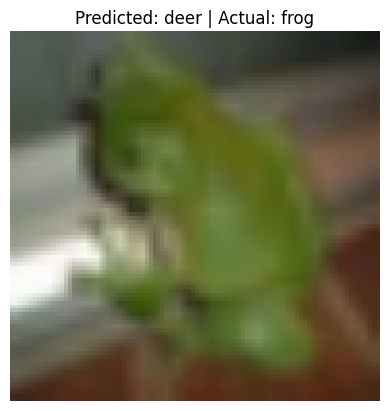

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input
from tensorflow.keras.optimizers import Adam

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

import tensorflow as tf
X_train = tf.image.resize(X_train, [96, 96])
X_test = tf.image.resize(X_test, [96, 96])

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(96, 96, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
output = Dense(10, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=output)

for layer in base_model.layers:
 layer.trainable = False

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=64)

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
def predict_sample(index):
 sample = X_test[index].numpy().reshape(1, 96, 96, 3)
 prediction = model.predict(sample)
 pred_class = class_names[np.argmax(prediction)]
 actual_class = class_names[np.argmax(y_test[index])]
 plt.imshow(X_test[index].numpy())
 plt.title(f"Predicted: {pred_class} | Actual: {actual_class}")
 plt.axis('off')
 plt.show()

predict_sample(7)
model.save("transfer_learning_cifar10_model.h5")